# Дерево решений - desicion tree

Решающим деревом (decision tree) - назовем модель представленную в виде бинарного дерева где:
1. $V$ - внутренняя вершина $\rightarrow \beta_v : X \rightarrow \{0,1\}$, - предикат
2. $V$ - лист $\rightarrow C_v :\in Y$, - прогноз

<div>
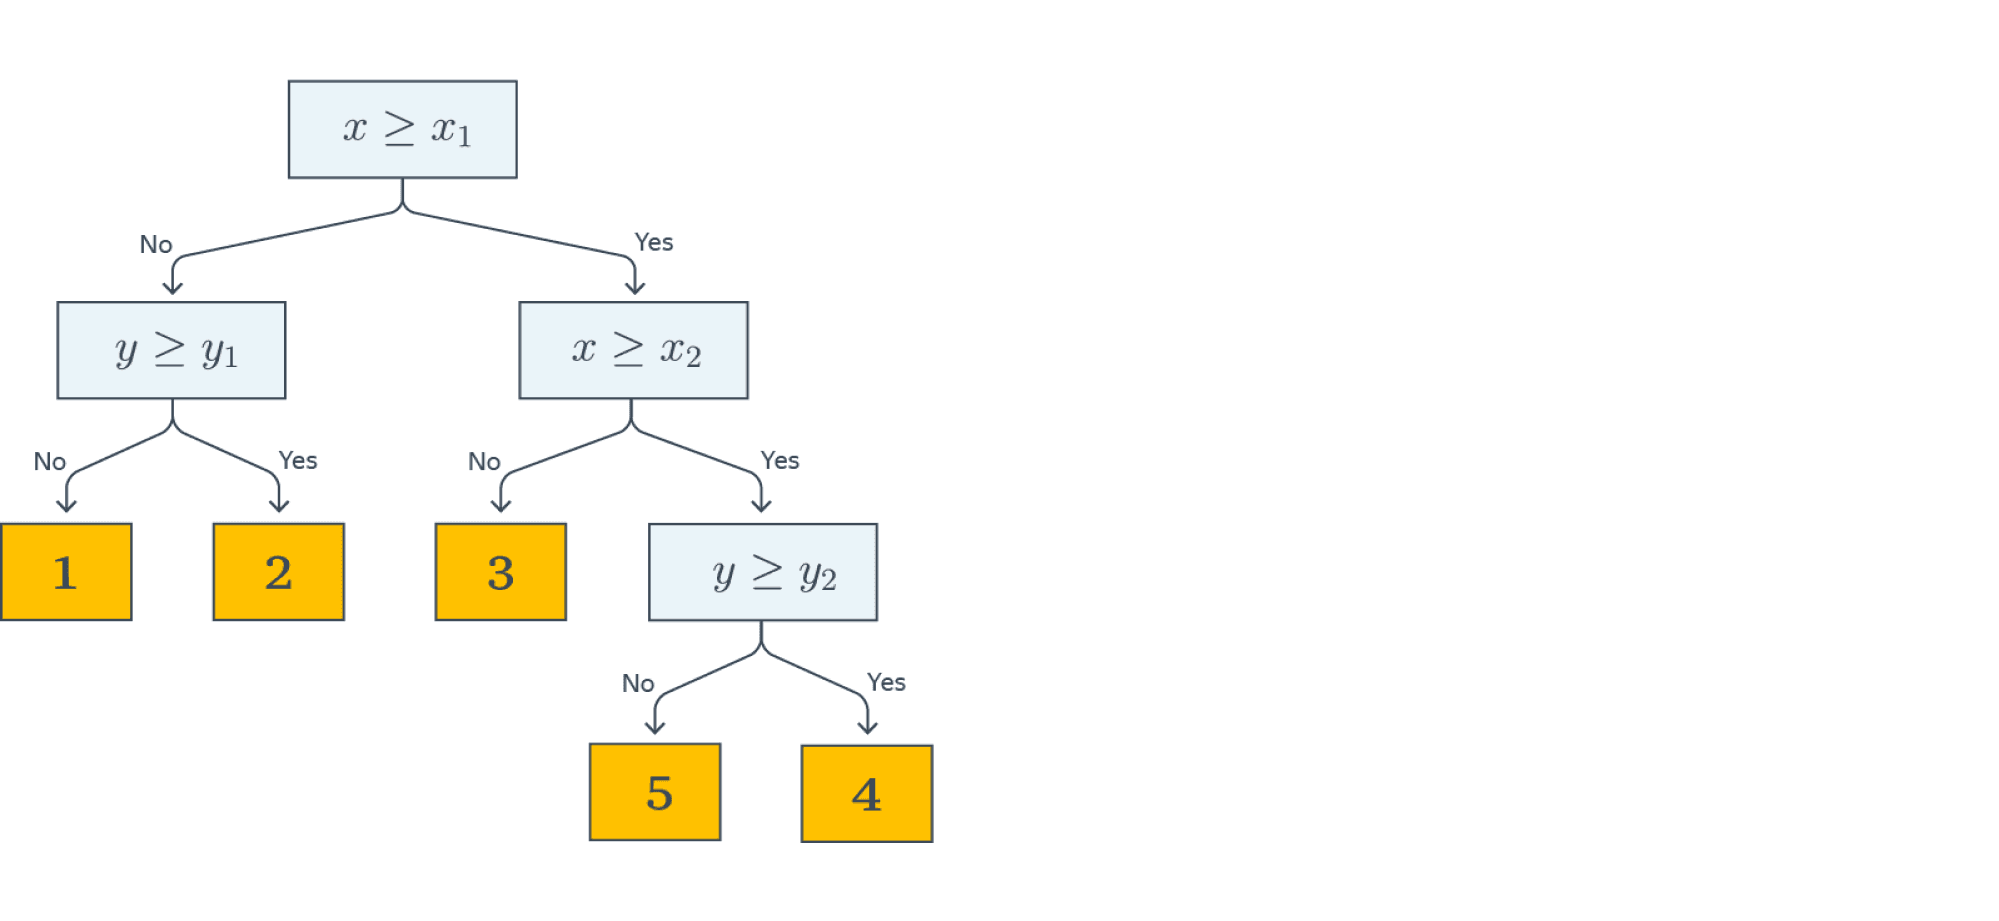
</div>


Виды предикатов:
1. $\beta_v(x) = [x_i \geq t]$ - смотрим конкретный признак и сравниваем с порогом
2. $\beta_v(x) = [\langle w, x \rangle] \geq t$ - линейный классификатор
3. $\beta_v(x) = [\rho(x,x_0) \geq t]$ - вхождение объекта в некоторой радиус-окрестности

Основная идея линейных деревьев - **кусочно-постоянная аппроксимация целевой зависимости**

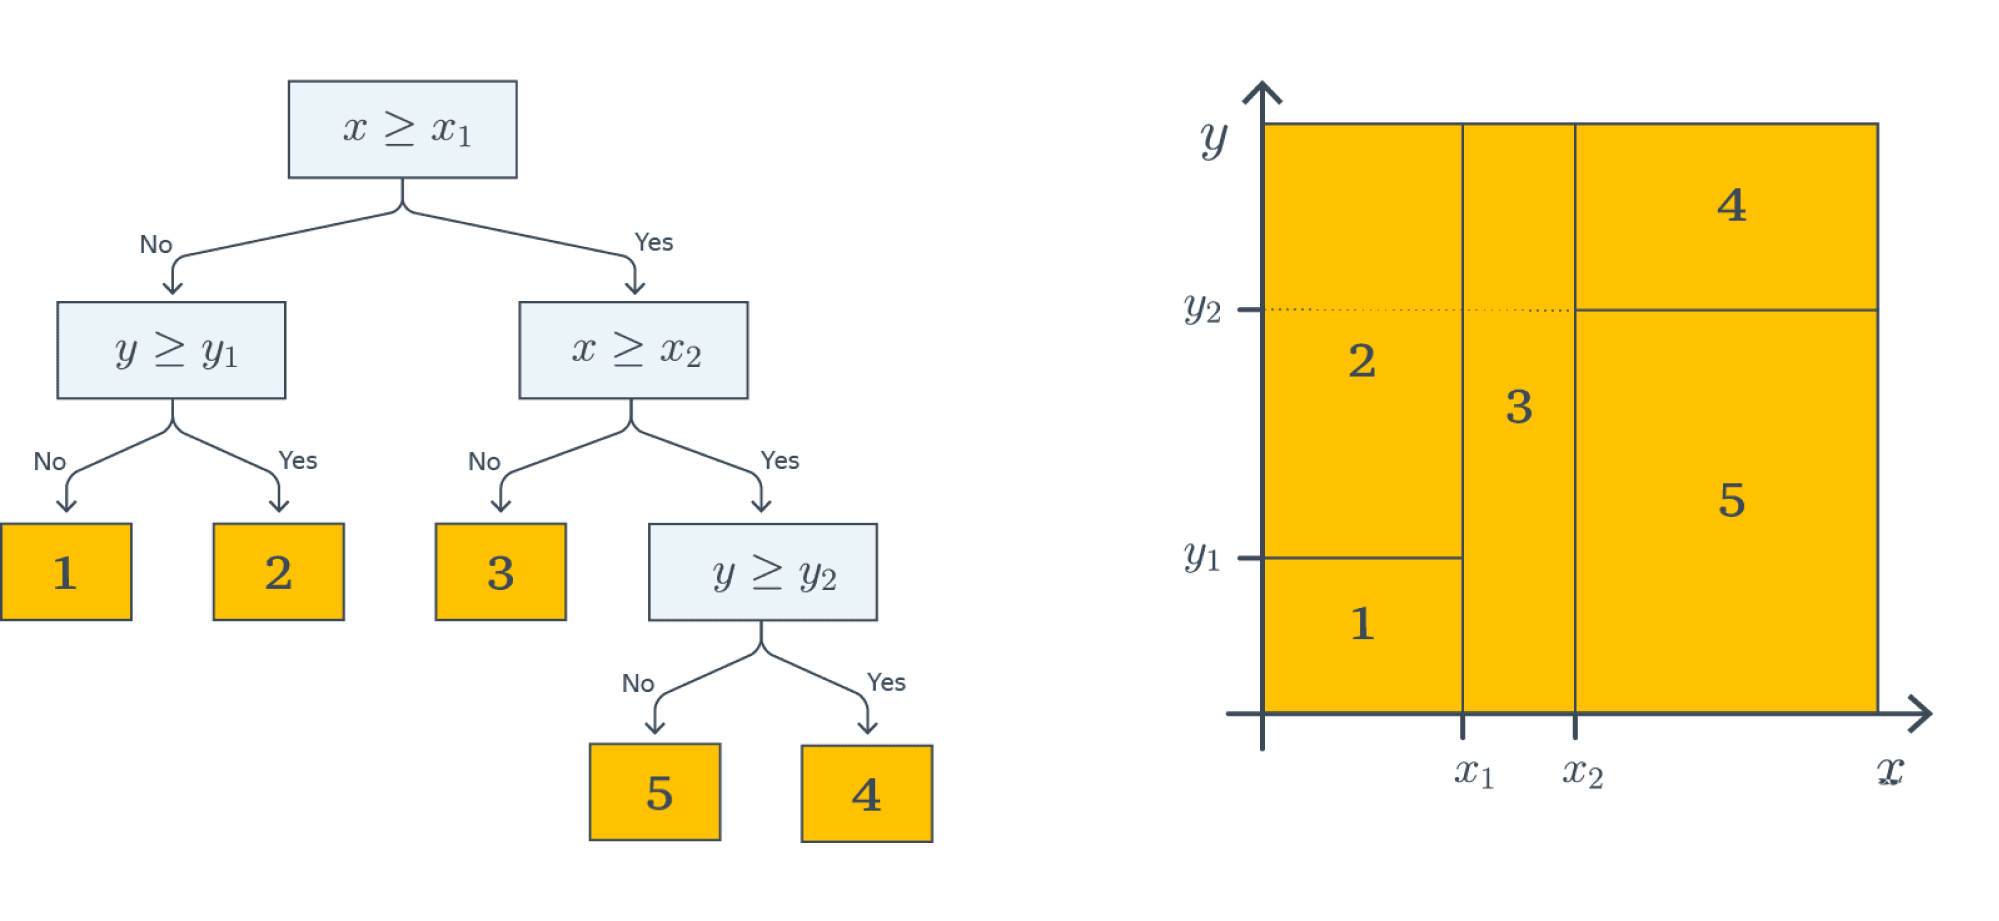

Виды прогнозов в деревьях:
1. Задача регрессии $\rightarrow C_v \in R$ - среднее по ответам в R_m (область)
2. Задача классификации $\rightarrow C_v \in Y$ - самый частный класс
3. Задача классификации при этом мы хотим уверенности в классах : $C_v \in R^k : C_{vk} \geq 0 , \sum_{k=0}^k C_{vk} = 1$ - доля классов

**Свойства деревьев:**

1. Если в $X$ нет $x_i = x_j$ и $y_i \neq y_j$, то существует дерево с нулевой ошибкой на $X$ $\rightarrow$ можно идеально переобучиться

Если из всех корректных на $X$ деревьев взять самое маленькое (по какому-либо критерию) то оно не будет переобученным - NP полная задача

2. Дерево решений не способно экстраполировать зависимости за пределы области значений обучающей выборки.

3. Т.к. функция является кусочно-постоянной, то производная в каждой точке равна 0, а следовательно градиентные оптимизационные методы - недоступны

**Жадный алгоритм обучения дерева**
1. Создаём вершину
2. Если выполнен критерий остановки, то останавливаемся, объявляем эту вершину листом и ставим ей в соответствие ответ, после чего возвращаем её. Иначе: находим предикат (иногда ещё говорят сплит), который определит наилучшее разбиение текущего множества объектов на две подвыборки и , максимизируя критерий ветвления.
3. рекурсивно повторим процедуру.

def stop_condtion() -> bool:

 pass

def calc_leaf_res():

 pass

def SplitNode(m,Rm):

 if stop_condition:

  C_v = calc_leaf_res()

 else:

 $j,t = argmax_{j=1..d, t \in R} Q(R_m,j,t)$



 $R_{\ell} \{(x,y) \in R_m | [x_j < t ]\}$

 $R_r \{(x,y) \in R_m | [x_j \geq t ]\}$

 $SplitNode(\ell, R_{\ell})$

 $SplitNode(r, R_r)$


где $Q(R_m,j,t)$ - функционал качества предиката или критерий информативности предиката

* R_m - объекты
* j   - признак
* t   - порог

argmax - выполняется как перебор т.к. перебираем все признаки

Т.е. на каждом сплите делаем полные перебор по всем возможным предикатам и смотрим на каком из предикатов максимально улучшает критерий ветвления

**Критерии останова**:
1. Максимальная глубина
2. Достигнуто минимальное число объектов в листе
3. Все объекты одного класса (доля ошибок в листе)

**Критерии информативности**

$H(R)$ - impurity - (хаотичность), показывающая меру разнородности ответов в $R$ (дисперсия, энтропия)

$Q(R_m,j,t) = H(R_m) - \dfrac{|R_{\ell}|}{|R_m|}H(R_l) - \dfrac{|R_{r}|}{|R_m|}H(R_r) \rightarrow max$

Стараемся выбрать предикаты таким образом, чтобы хаотичность после разбиения стала минимальна.

Нормировка $\dfrac{|R_{\ell}|}{|R_m|}, \dfrac{|R_{r}|}{|R_m|}$ - необходима для балансирования дерева, и предотвращения появления деревьев шагающих только в одну сторону

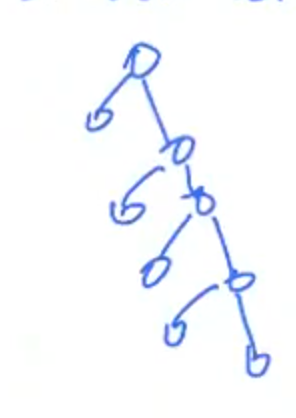

$H(R) = min_{c\in Y} \dfrac{1}{|R|} \sum_{(x_i,y_i) \in R} L(y_i, c)$ - ошибка лучшего константного предсказания (ищем лучшую константу с наименьшей ошибкой на выборке $R$)

Если констатной возможно добиться низкой ошибки то хаотичность низкая

* регрессия : дисперсия ответов в $R$

* классификация: критерий  Gini $\sum_{k=1}^k p_k \cdot (1-p_k)$, где $p_k$ - доля объектов с $y_i = k \in R$

* классификация: энтропийный критерий $\sum_{k=1}^k p_k \log{p_k}$

Нюансы деревьев:

1. **Pruning (стрижка)**

При построении дерева, и изначальном ограничении размера дерева, можно излишне упростить модель. Чтобы этого избежать - возможно построить дерево очень грубоким, после чего "обрезать" его 

Хорошо подойдет на этом случае (другой вариант - адекватный критерий останова)

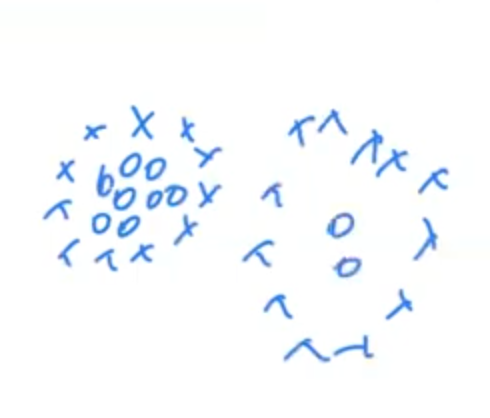

2. **Обработка пропусков**

*Вариант 1* 

Если в  $R$ у признака $j$ есть пропуски, то предположим что $V_j(R)$ - объекты из $R$ у которых  $x_j$ неизвестно. Тогда посчитаем без объектов с пустыми признаками

$$Q(R,j,t) = \dfrac{|R \setminus V_j(R)|}{|R|}  Q(R \setminus V_j(R),j,t)$$

Если выбран предикат с $j$ признаком то объекты с пропусками отправляем и влево и вправо с весами долей объектов в левом и в правом поддереве $\dfrac{|R_{ell}|}{|R|}$ $\dfrac{|R_r|}{|R|}$ соответственно

$a_{m,k}(x)$ - прогноз вероятности класса $k$ в вершине $m$

$$a_{m,k}(x) = \begin{cases} a_{\ell,k}(x) , \beta_m(x) = 0 \\ a_{r,k}(x), \beta_m(x) = 1  \\  \dfrac{R_{\ell}}{R_{m}}a_{\ell,k}(x) + \dfrac{R_{r}}{R_{m}}a_{r,k}(x),   \beta_m(x)? \end{cases}$$   

*Вариант 2* - сурогатные предикаты

* Выбираем лучший предикат без учёта пропусков
* Ищем несколько суррогатных предикатов (которые дают близкие разбиения

Считать близость разбиений  $R_{\ell}, R_r$ и $R_{ell}',R_r'$ можно мерой Жоккара

$$J = \dfrac{|R_\ell \cap R_{\ell}'|}{|R_{\ell} \cup R_{\ell}'|}$$

если множества совпадают, мера близка к 1. в обратном случае 0 

получаем набор предикатов: $\beta(x),\beta(x)',\beta(x)''$ - при использовании если встречаем пропуск, то используем другой предикат

**Обработка категориальных признаков**



Пусть $x_j$ - категориальный признак.

$x_j \in Q = {u_1, u_2, ..., u_q}$

*Тривиальный вариант 1*: Разбиение на q дочерних вершин в дереве после предиката по категориальному признаку. 

Минус - непонятно как оценивать качество разбиений. Средняя хаотичность будет по кат. признакам всегда мала, и модель будет всегда выбирать предикаты с "жирными" кат. признаками

*Вариант 2*

Пусть 

$R_m(u) = \{(x,y) \in R_m | x_j = u \}$ - набор объектов из вершины $R_m$ что значение признака  $u$

$N_m(u) = |R_m(u)|$ - мощность

$Y = \{-1,1\}$

$Q = Q_1 \cup Q_2$; $\beta(x) = [x_j \in Q_1]$

Вопрос - как найти хорошее разбиение? 

Упорядочим наши категории таким образом что: $\dfrac{1}{N_m(u_{(1)})} \sum_{x_i \in R_m(u_{(1)}} [y_i=+1] \leq ... \leq \dfrac{1}{N_m(u_{(q)})} \sum_{x_i \in R_m(u_{(q)})} [y_i = +1] $

$u_{(1)},| u_{(2)},| u_{(3)},| ..., |u_{(q)}$ - Далее утверждается что произведя q разбиений, гарантированно найдется разбиение гарантирующее лучший прирост Gini (p.s. The elements of statistical learning)

При регрессии, разбиваем по среднему предикту

**Методы построения деревьев**

Модификации жадного метода

* $ID_{3}$ - энтропийный критерий, критерий останова
* $C_{4.5}$ - Gain Ratio - нормированный энтропийный критерий, стрижка, критерий останова - кол-во элементов в листе, обработка пропусков
* CART - Classification and Regression Trees - сурогатные предикаты

**Связь решающих деревьев и линейных моделей**:

1. дерево - линейная модель? 
При применении деревьев, пространтсво $X$ разбивается на $n$ непересекающихся областей для каждой из которых соответствует прогноз $w_1, w_2, ... w_n$

Тогда дерево это:

$a(x) = \sum^n_{j=1} w_j [x\in J_i]$ - запись дерева как линейной модели

Т.е. дерево находит новые нелинейные признаки, а после строит линейную модель 

2. Категоризация признака деревом

Можно построить деревья, со случайным предикатом и использовать номера листьев как признаки